# The Effect of Data Breaches on Stock Price

**Researcher:** Natalie Sachmechi  
**Email:** nls349@nyu.edu


Using data from Morningstar, I will explore the way in which data breaches affect on the shareholder values of 11 companies in various industries. Through an analysis of stock prices in the 10-day period surrounding the report of the data breach of each company, the research will illustrate the effect of the data breach on the company's stock performance before, during, and after the breach as well as each industry's trends in reaction to breaches.

Data breaches are the subject of today's news, with people resorting to boycotting Facebook to protect their data from being shared with unauthorized third parties, whether intentionally or not. Facebook has reported reduced advertising revenues following large breaches and even a shift towards more user-produced content rather than branded and sponsored content. 

The stock data for this project will come from Morningstar, specifically for an 11 day period, with the data breach report placed at the center of the date range, or timeline. Each company will have its data extracted from morningstar and placed alongside that of the others for individual as well as comparative analysis across companies and industries.

In this project, I will answer three questions:
1. How do data breaches affect shareholder value in general?
2. How do the effects of data breaches on shareholder value vary across industries?
3. Does the size of the breach have any effect on the change in stock price following the breach?

I will use line graphs to illustrate the behavior of each company's stock, while also calculating the percent change in stock price, whether positive or negative, following each breach. I will also calculate the mean percent change in stock price for each industry and company to compare averages. The size of each breach, or number of users affected by it, will be retreieved for further analysis comparing those numbers to the percent change in stock price.

The companies that will be analyzed in this project include:

**Adobe:** A software company.  
**Anthem:** A health insurance company.  
**eBay:** An online retailer.  
**Equifax:** A credit reporting agency.  
**Facebook:** An online social media platform.  
**Home Depot:** A home improvement retailer.  
**JP Morgan:** A multinational financial services firm.  
**SONY:** A gaming and electronics company.  
**Target:** A discount goods department store.  
**TJX:** A discount goods department store.  
**Yahoo:** An online news, search, media outlet.  

The industries they represent include:

**Finance**  
**Insurance**  
**Retail**  
**Technology**  

## 1. Retreiving the Data

The data will be imported from Morningstar. I will take data specifically for each company and the 10 days surrounding the date of the breach. Each company will then have 11 rows of stock data, labeled from -5 to 5, representing the date's location before and after the breach report date. I have done this so that the data for each company can be merged cohesively and also presented more clearly on a graph. The number 0 on each timeline will represent the date that the breach was reported.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import pandas_datareader as dr

This is where I begin extracting the data, using morningstar. The data includes the company's ticker, the eleven days surrounding the breach as well as the timeline number for each respective day, the day's close price, the day's high, the day's low, it's opening price, and trading volume.  I have also included the type of industry each company is in, labeled as "Type." I will use this column to compare the effect of breaches across industries.

In [3]:
breachdate = "3/16/2018" # Here, I identify the date the breach was reported.

#The following two lines set the range of dates I will be looking at.
start = pd.to_datetime(breachdate) + pd.DateOffset(days=-7) 
end = pd.to_datetime(breachdate) + pd.DateOffset(days=7)   
fb = dr.DataReader("FB", 'morningstar', start, end) 
#This brings in the stock information from morningstar for the specified dates.

fb.reset_index(inplace=True)                        
fb["Type"] = ("Tech") 
#This column identifies the industry the company is in.
fb["Company"] = ("Facebook") 
#This column identifies the company.
fb["Timeline"] = pd.RangeIndex(-5,6) 
#This column numbers the dates according to a timeline surrounding the breach.
fb

,Symbol,Date,Close,High,Low,Open,Volume,Type,Company,Timeline
0,FB,2018-03-09,185.23,185.51,183.21,183.91,18526292,Tech,Facebook,-5
1,FB,2018-03-12,184.76,186.10,184.22,185.23,15301229,Tech,Facebook,-4
2,FB,2018-03-13,181.88,185.99,181.11,185.61,18067477,Tech,Facebook,-3
3,FB,2018-03-14,184.19,184.25,181.85,182.60,16821728,Tech,Facebook,-2
4,FB,2018-03-15,183.86,184.00,182.19,183.24,15645035,Tech,Facebook,-1
5,FB,2018-03-16,185.09,185.33,183.41,184.49,24403438,Tech,Facebook,0
6,FB,2018-03-19,172.56,177.17,170.06,177.01,88140060,Tech,Facebook,1
7,FB,2018-03-20,168.15,170.20,161.95,167.47,129851768,Tech,Facebook,2
8,FB,2018-03-21,169.39,173.40,163.30,164.80,106598834,Tech,Facebook,3
9,FB,2018-03-22,164.89,170.27,163.72,166.13,73742979,Tech,Facebook,4


In [4]:
breachdate = "9/7/2017"
start = pd.to_datetime(breachdate) + pd.DateOffset(days=-7)
end = pd.to_datetime(breachdate) + pd.DateOffset(days=7)
efx = dr.DataReader("EFX", 'morningstar', start, end)
efx.reset_index(inplace=True)
efx["Type"] = ("Financial")
efx["Company"] = ("Equifax")
efx["Timeline"] = pd.RangeIndex(-5,6)
efx

,Symbol,Date,Close,High,Low,Open,Volume,Type,Company,Timeline
0,EFX,2017-08-31,142.47,143.27,141.77,141.78,425417,Financial,Equifax,-5
1,EFX,2017-09-01,141.59,143.37,141.59,142.73,363111,Financial,Equifax,-4
2,EFX,2017-09-04,141.59,141.59,141.59,141.59,0,Financial,Equifax,-3
3,EFX,2017-09-05,141.10,142.49,140.57,141.42,495148,Financial,Equifax,-2
4,EFX,2017-09-06,141.39,142.14,141.02,141.58,452154,Financial,Equifax,-1
5,EFX,2017-09-07,142.72,143.27,141.35,141.45,499797,Financial,Equifax,0
6,EFX,2017-09-08,123.23,125.50,117.25,121.82,16848398,Financial,Equifax,1
7,EFX,2017-09-11,113.12,122.00,111.17,121.53,9820487,Financial,Equifax,2
8,EFX,2017-09-12,115.96,116.08,112.18,112.97,6937090,Financial,Equifax,3
9,EFX,2017-09-13,98.99,116.75,98.04,116.55,17494316,Financial,Equifax,4


In [5]:
breachdate = "12/14/2016"
start = pd.to_datetime(breachdate) + pd.DateOffset(days=-7)
end = pd.to_datetime(breachdate) + pd.DateOffset(days=7)
yhoo = dr.DataReader("YHOO", 'morningstar', start, end)
yhoo.reset_index(inplace=True)
yhoo["Type"] = ("Tech")
yhoo["Company"] = ("Yahoo")
yhoo["Timeline"] = pd.RangeIndex(-5,6)
yhoo

,Symbol,Date,Close,High,Low,Open,Volume,Type,Company,Timeline
0,YHOO,2016-12-07,40.52,40.57,39.7500,39.98,7208492,Tech,Yahoo,-5
1,YHOO,2016-12-08,41.41,41.60,40.4168,40.66,9171707,Tech,Yahoo,-4
2,YHOO,2016-12-09,41.76,41.80,41.4400,41.52,6836112,Tech,Yahoo,-3
3,YHOO,2016-12-12,41.30,41.53,41.1250,41.45,4451709,Tech,Yahoo,-2
4,YHOO,2016-12-13,41.47,41.79,41.1400,41.35,6564552,Tech,Yahoo,-1
5,YHOO,2016-12-14,40.91,41.53,40.8300,41.44,19555694,Tech,Yahoo,0
6,YHOO,2016-12-15,38.41,40.00,38.2500,40.00,43669990,Tech,Yahoo,1
7,YHOO,2016-12-16,38.61,39.22,38.4200,38.62,21694081,Tech,Yahoo,2
8,YHOO,2016-12-19,38.42,38.79,38.2700,38.66,13615511,Tech,Yahoo,3
9,YHOO,2016-12-20,39.16,39.18,38.2400,38.40,25008427,Tech,Yahoo,4


In [6]:
breachdate = "9/8/2014"
start = pd.to_datetime(breachdate) + pd.DateOffset(days=-7)
end = pd.to_datetime(breachdate) + pd.DateOffset(days=7)
hd = dr.DataReader("HD", 'morningstar', start, end)
hd.reset_index(inplace=True)
hd["Type"] = ("Retail")
hd["Company"] = ("Home Depot")
hd["Timeline"] = pd.RangeIndex(-5,6)
hd

,Symbol,Date,Close,High,Low,Open,Volume,Type,Company,Timeline
0,HD,2014-09-01,93.50,93.50,93.5000,93.50,0,Retail,Home Depot,-5
1,HD,2014-09-02,91.15,93.31,89.8500,93.04,20753212,Retail,Home Depot,-4
2,HD,2014-09-03,89.00,91.31,88.9800,91.11,15413898,Retail,Home Depot,-3
3,HD,2014-09-04,89.93,90.75,89.0000,89.00,8453181,Retail,Home Depot,-2
4,HD,2014-09-05,91.61,91.64,89.2809,89.66,7748251,Retail,Home Depot,-1
5,HD,2014-09-08,90.82,91.78,90.5700,91.38,4888298,Retail,Home Depot,0
6,HD,2014-09-09,88.93,90.33,88.7750,90.21,8105283,Retail,Home Depot,1
7,HD,2014-09-10,89.25,89.40,88.3300,88.66,6245512,Retail,Home Depot,2
8,HD,2014-09-11,89.22,89.42,88.6200,89.07,4538983,Retail,Home Depot,3
9,HD,2014-09-12,88.84,89.50,88.4600,89.38,4593705,Retail,Home Depot,4


In [7]:
breachdate = "12/19/2013"
start = pd.to_datetime(breachdate) + pd.DateOffset(days=-7)
end = pd.to_datetime(breachdate) + pd.DateOffset(days=7)
tgt = dr.DataReader("TGT", 'morningstar', start, end)
tgt.reset_index(inplace=True)
tgt["Type"] = ("Retail")
tgt["Company"] = ("Target")
tgt["Timeline"] = pd.RangeIndex(-5,6)
tgt

,Symbol,Date,Close,High,Low,Open,Volume,Type,Company,Timeline
0,TGT,2013-12-12,62.89,63.24,62.7500,62.94,4029226,Retail,Target,-5
1,TGT,2013-12-13,62.36,63.24,62.2900,63.23,4751040,Retail,Target,-4
2,TGT,2013-12-16,62.17,62.51,61.7300,62.44,4776792,Retail,Target,-3
3,TGT,2013-12-17,61.65,62.15,61.4400,62.12,5315422,Retail,Target,-2
4,TGT,2013-12-18,63.55,63.59,62.4300,62.52,8305331,Retail,Target,-1
5,TGT,2013-12-19,62.15,62.89,61.9800,62.22,7903937,Retail,Target,0
6,TGT,2013-12-20,62.49,62.66,62.0200,62.12,6869129,Retail,Target,1
7,TGT,2013-12-23,61.88,62.15,61.5349,62.00,5726545,Retail,Target,2
8,TGT,2013-12-24,61.71,61.75,61.2600,61.60,3356284,Retail,Target,3
9,TGT,2013-12-25,61.71,61.71,61.7100,61.71,0,Retail,Target,4


In [8]:
breachdate = "5/21/2013"
start = pd.to_datetime(breachdate) + pd.DateOffset(days=-7)
end = pd.to_datetime(breachdate) + pd.DateOffset(days=7)
ebay = dr.DataReader("EBAY", 'morningstar', start, end)
ebay.reset_index(inplace=True)
ebay["Type"] = ("Retail")
ebay["Company"] = ("Ebay")
ebay["Timeline"] = pd.RangeIndex(-5,6)
ebay

,Symbol,Date,Close,High,Low,Open,Volume,Type,Company,Timeline
0,EBAY,2013-05-14,23.6828,23.7417,23.2072,23.2325,21924170,Retail,Ebay,-5
1,EBAY,2013-05-15,23.8427,23.8554,23.5944,23.6828,20357669,Retail,Ebay,-4
2,EBAY,2013-05-16,23.4850,23.9480,23.4513,23.9059,20246798,Retail,Ebay,-3
3,EBAY,2013-05-17,23.8680,24.0342,23.7670,23.7754,27464373,Retail,Ebay,-2
4,EBAY,2013-05-20,23.5481,23.8469,23.4660,23.8049,20813269,Retail,Ebay,-1
5,EBAY,2013-05-21,23.1272,23.6155,23.1230,23.5523,30956267,Retail,Ebay,0
6,EBAY,2013-05-22,22.8958,23.4934,22.7821,23.2451,27209575,Retail,Ebay,1
7,EBAY,2013-05-23,22.9294,22.9631,22.4412,22.5591,22583084,Retail,Ebay,2
8,EBAY,2013-05-24,22.9968,23.0010,22.5464,22.6306,17368809,Retail,Ebay,3
9,EBAY,2013-05-27,22.9968,22.9968,22.9968,22.9968,0,Retail,Ebay,4


In [9]:
breachdate = "2015-2-4"
start = pd.to_datetime(breachdate) + pd.DateOffset(days=-7)
end = pd.to_datetime(breachdate) + pd.DateOffset(days=7)
antm = dr.DataReader("ANTM", 'morningstar', start, end)
antm.reset_index(inplace=True)
antm["Type"] = ("Insurance")
antm["Company"] = ("Anthem")
antm["Timeline"] = pd.RangeIndex(-5,6)
antm


,Symbol,Date,Close,High,Low,Open,Volume,Type,Company,Timeline
0,ANTM,2015-01-28,133.58,139.28,133.03,138.21,3476169,Insurance,Anthem,-5
1,ANTM,2015-01-29,137.10,137.37,133.76,134.62,1950356,Insurance,Anthem,-4
2,ANTM,2015-01-30,134.96,137.40,134.14,135.41,2246853,Insurance,Anthem,-3
3,ANTM,2015-02-02,135.50,135.59,132.94,134.96,1819776,Insurance,Anthem,-2
4,ANTM,2015-02-03,136.96,137.24,135.50,136.08,1710527,Insurance,Anthem,-1
5,ANTM,2015-02-04,137.65,138.67,135.40,136.49,1674628,Insurance,Anthem,0
6,ANTM,2015-02-05,137.23,138.37,135.40,135.50,2314611,Insurance,Anthem,1
7,ANTM,2015-02-06,135.69,137.23,135.09,136.95,2244555,Insurance,Anthem,2
8,ANTM,2015-02-09,134.88,135.69,134.38,134.79,1745541,Insurance,Anthem,3
9,ANTM,2015-02-10,138.74,139.04,135.61,136.38,2100226,Insurance,Anthem,4


In [10]:
breachdate = "2014-10-2"
start = pd.to_datetime(breachdate) + pd.DateOffset(days=-7)
end = pd.to_datetime(breachdate) + pd.DateOffset(days=7)
jpm = dr.DataReader("JPM", 'morningstar', start, end)
jpm.reset_index(inplace=True)
jpm["Type"] = ("Financial")
jpm["Company"] = ("JP Morgan")
jpm["Timeline"] = pd.RangeIndex(-5,6)
jpm

,Symbol,Date,Close,High,Low,Open,Volume,Type,Company,Timeline
0,JPM,2014-09-25,60.15,61.500,60.150,61.49,16346723,Financial,JP Morgan,-5
1,JPM,2014-09-26,60.56,60.880,60.320,60.33,11948887,Financial,JP Morgan,-4
2,JPM,2014-09-29,60.33,60.500,59.730,60.03,10694938,Financial,JP Morgan,-3
3,JPM,2014-09-30,60.24,60.740,60.130,60.40,14384783,Financial,JP Morgan,-2
4,JPM,2014-10-01,59.77,60.400,59.730,60.24,18995987,Financial,JP Morgan,-1
5,JPM,2014-10-02,58.84,59.490,58.610,59.15,24561606,Financial,JP Morgan,0
6,JPM,2014-10-03,60.30,60.385,59.050,59.25,18321078,Financial,JP Morgan,1
7,JPM,2014-10-06,60.18,60.800,60.000,60.78,11578147,Financial,JP Morgan,2
8,JPM,2014-10-07,59.27,59.920,59.185,59.92,14542010,Financial,JP Morgan,3
9,JPM,2014-10-08,60.40,60.430,59.180,59.36,15834553,Financial,JP Morgan,4


In [574]:
breachdate = "2007-1-17"
start = pd.to_datetime(breachdate) + pd.DateOffset(days=-7)
end = pd.to_datetime(breachdate) + pd.DateOffset(days=7)
tjx = dr.DataReader("TJX", 'morningstar', start, end)
tjx.reset_index(inplace=True)
tjx["Type"] = ("Retail")
tjx["Company"] = ("TJX")
tjx["Timeline"] = pd.RangeIndex(-5,6)
tjx

,Symbol,Date,Close,High,Low,Open,Volume,Type,Company,Timeline
0,TJX,2007-01-10,14.745,14.805,14.485,14.585,3447200,Retail,TJX,-5
1,TJX,2007-01-11,14.970,14.990,14.750,14.750,5143600,Retail,TJX,-4
2,TJX,2007-01-12,14.970,15.080,14.800,14.845,8109600,Retail,TJX,-3
3,TJX,2007-01-15,14.970,15.080,14.800,14.845,0,Retail,TJX,-2
4,TJX,2007-01-16,14.925,15.000,14.655,14.970,5418400,Retail,TJX,-1
5,TJX,2007-01-17,14.815,15.050,14.425,14.865,10458400,Retail,TJX,0
6,TJX,2007-01-18,14.750,14.795,14.500,14.775,10340200,Retail,TJX,1
7,TJX,2007-01-19,15.015,15.035,14.595,14.915,8891600,Retail,TJX,2
8,TJX,2007-01-22,14.975,15.020,14.760,14.985,9597200,Retail,TJX,3
9,TJX,2007-01-23,14.920,15.040,14.815,14.975,5838600,Retail,TJX,4


In [575]:
breachdate = "2011-4-20"
start = pd.to_datetime(breachdate) + pd.DateOffset(days=-7)
end = pd.to_datetime(breachdate) + pd.DateOffset(days=7)
sne = dr.DataReader("SNE", 'morningstar', start, end)
sne.reset_index(inplace=True)
sne["Type"] = ("Tech")
sne["Company"] = ("SONY")
sne["Timeline"] = pd.RangeIndex(-5,6)
sne


,Symbol,Date,Close,High,Low,Open,Volume,Type,Company,Timeline
0,SNE,2011-04-13,29.78,29.99,29.610,29.960,1460889,Tech,SONY,-5
1,SNE,2011-04-14,29.69,29.80,29.581,29.690,515569,Tech,SONY,-4
2,SNE,2011-04-15,29.69,29.72,29.520,29.540,591641,Tech,SONY,-3
3,SNE,2011-04-18,29.25,29.32,28.910,28.950,876065,Tech,SONY,-2
4,SNE,2011-04-19,29.71,29.78,29.410,29.420,560330,Tech,SONY,-1
5,SNE,2011-04-20,30.14,30.15,29.940,30.030,909392,Tech,SONY,0
6,SNE,2011-04-21,30.50,30.63,30.350,30.620,1276821,Tech,SONY,1
7,SNE,2011-04-22,30.50,30.63,30.350,30.620,0,Tech,SONY,2
8,SNE,2011-04-25,30.09,30.26,29.910,30.260,595962,Tech,SONY,3
9,SNE,2011-04-26,29.79,29.79,29.560,29.755,773682,Tech,SONY,4


In [576]:
breachdate = "2013-10-3"
start = pd.to_datetime(breachdate) + pd.DateOffset(days=-7)
end = pd.to_datetime(breachdate) + pd.DateOffset(days=7)
adbe = dr.DataReader("ADBE", 'morningstar', start, end)
adbe.reset_index(inplace=True)
adbe["Type"] = ("Tech")
adbe["Company"] = ("Adobe")
adbe["Timeline"] = pd.RangeIndex(-5,6)
adbe

,Symbol,Date,Close,High,Low,Open,Volume,Type,Company,Timeline
0,ADBE,2013-09-26,52.100,52.38,51.810,52.00,2902916,Tech,Adobe,-5
1,ADBE,2013-09-27,52.030,52.48,51.650,51.71,2382014,Tech,Adobe,-4
2,ADBE,2013-09-30,51.940,52.15,51.202,51.50,2748601,Tech,Adobe,-3
3,ADBE,2013-10-01,52.430,52.48,51.840,52.10,3243476,Tech,Adobe,-2
4,ADBE,2013-10-02,51.520,52.28,51.290,51.88,3691656,Tech,Adobe,-1
5,ADBE,2013-10-03,50.880,51.65,50.540,51.61,3862291,Tech,Adobe,0
6,ADBE,2013-10-04,51.570,51.67,50.020,50.09,3881470,Tech,Adobe,1
7,ADBE,2013-10-07,50.820,51.34,50.790,51.05,2582671,Tech,Adobe,2
8,ADBE,2013-10-08,49.580,50.97,49.440,50.93,4953841,Tech,Adobe,3
9,ADBE,2013-10-09,49.450,49.87,48.870,49.62,4347529,Tech,Adobe,4


# 2. Organizing the Data

Now I will take all of the data extracted from morningstar above, create common columns, and then place all dataframes on top of eachother to make on large dataframe. I will then perform operations on the larger dataframe to sort and group by the variables I would like to analyze.

In [577]:
all_dfs = [fb, efx, tgt,jpm,adbe,hd,sne,tjx,antm,ebay,yhoo]

# Give all df's common column names so that they can be concatenated cohesively.
for df in all_dfs:
    df.columns = ['Symbol', 'Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Industry','Company','Timeline']

bigdata = pd.concat(all_dfs).reset_index(drop=True)

bigdata


,Symbol,Date,Close,High,Low,Open,Volume,Industry,Company,Timeline
0,FB,2018-03-09,185.2300,185.5100,183.2100,183.9100,18526292,Tech,Facebook,-5
1,FB,2018-03-12,184.7600,186.1000,184.2200,185.2300,15301229,Tech,Facebook,-4
2,FB,2018-03-13,181.8800,185.9900,181.1100,185.6100,18067477,Tech,Facebook,-3
3,FB,2018-03-14,184.1900,184.2500,181.8500,182.6000,16821728,Tech,Facebook,-2
4,FB,2018-03-15,183.8600,184.0000,182.1900,183.2400,15645035,Tech,Facebook,-1
5,FB,2018-03-16,185.0900,185.3300,183.4100,184.4900,24403438,Tech,Facebook,0
6,FB,2018-03-19,172.5600,177.1700,170.0600,177.0100,88140060,Tech,Facebook,1
7,FB,2018-03-20,168.1500,170.2000,161.9500,167.4700,129851768,Tech,Facebook,2
8,FB,2018-03-21,169.3900,173.4000,163.3000,164.8000,106598834,Tech,Facebook,3
9,FB,2018-03-22,164.8900,170.2700,163.7200,166.1300,73742979,Tech,Facebook,4


In [578]:
bigdata['Percent_Change'] = bigdata.groupby('Company')['Close'].pct_change()*100
# Include a percent change column to analyze the magnitude of daily price changes.

bigdata.sort_values(["Industry","Company"], inplace=True)  # Sort dada by Type and Company                     

bigdata.set_index(["Industry","Company"]) # Set the main index as Type, but also by Company. 
# With this model, I can make better inferences about the behavior within 
#each industry with respect to each company.





Symbol       Date   Close     High       Low     Open  \
Industry  Company                                                           
Financial Equifax      EFX 2017-08-31  142.47  143.270  141.7700  141.780   
          Equifax      EFX 2017-09-01  141.59  143.370  141.5900  142.730   
          Equifax      EFX 2017-09-04  141.59  141.590  141.5900  141.590   
          Equifax      EFX 2017-09-05  141.10  142.490  140.5700  141.420   
          Equifax      EFX 2017-09-06  141.39  142.140  141.0200  141.580   
          Equifax      EFX 2017-09-07  142.72  143.270  141.3500  141.450   
          Equifax      EFX 2017-09-08  123.23  125.500  117.2500  121.820   
          Equifax      EFX 2017-09-11  113.12  122.000  111.1700  121.530   
          Equifax      EFX 2017-09-12  115.96  116.080  112.1800  112.970   
          Equifax      EFX 2017-09-13   98.99  116.750   98.0400  116.550   
          Equifax      EFX 2017-09-14   96.66  100.750   89.5900   98.690   
          JP Morgan    JPM 2014-09-25   60.15   61.500   60.1500   61.490   
          JP Morgan    JPM 2014-09-26   60.56   60.880   60.3200   60.330   
          JP Morgan    JPM 2014-09-29   60.33   60.500   59.7300   60.030   
          JP Morgan    JPM 2014-09-30   60.24   60.740   60.1300   60.400   
          JP Morgan    JPM 2014-10-01   59.77   60.400   59.7300   60.240   
          JP Morgan    JPM 2014-10-02   58.84   59.490   58.6100   59.150   
          JP Morgan    JPM 2014-10-03   60.30   60.385   59.0500   59.250   
          JP Morgan    JPM 2014-10-06   60.18   60.800   60.0000   60.780   
          JP Morgan    JPM 2014-10-07   59.27   59.920   59.1850   59.920   
          JP Morgan    JPM 2014-10-08   60.40   60.430   59.1800   59.360   
          JP Morgan    JPM 2014-10-09   59.08   60.330   58.8900   60.330   
Insurance Anthem      ANTM 2015-01-28  133.58  139.280  133.0300  138.210   
          Anthem      ANTM 2015-01-29  137.10  137.370  133.7600  134.620   
          Anthem      ANTM 2015-01-30  134.96  137.400  134.1400  135.410   
          Anthem      ANTM 2015-02-02  135.50  135.590  132.9400  134.960   
          Anthem      ANTM 2015-02-03  136.96  137.240  135.5000  136.080   
          Anthem      ANTM 2015-02-04  137.65  138.670  135.4000  136.490   
          Anthem      ANTM 2015-02-05  137.23  138.370  135.4000  135.500   
          Anthem      ANTM 2015-02-06  135.69  137.230  135.0900  136.950   
...                    ...        ...     ...      ...       ...      ...   
Tech      Facebook      FB 2018-03-14  184.19  184.250  181.8500  182.600   
          Facebook      FB 2018-03-15  183.86  184.000  182.1900  183.240   
          Facebook      FB 2018-03-16  185.09  185.330  183.4100  184.490   
          Facebook      FB 2018-03-19  172.56  177.170  170.0600  177.010   
          Facebook      FB 2018-03-20  168.15  170.200  161.9500  167.470   
          Facebook      FB 2018-03-21  169.39  173.400  163.3000  164.800   
          Facebook      FB 2018-03-22  164.89  170.270  163.7200  166.130   
          Facebook      FB 2018-03-23  159.39  167.100  159.0200  165.440   
          SONY         SNE 2011-04-13   29.78   29.990   29.6100   29.960   
          SONY         SNE 2011-04-14   29.69   29.800   29.5810   29.690   
          SONY         SNE 2011-04-15   29.69   29.720   29.5200   29.540   
          SONY         SNE 2011-04-18   29.25   29.320   28.9100   28.950   
          SONY         SNE 2011-04-19   29.71   29.780   29.4100   29.420   
          SONY         SNE 2011-04-20   30.14   30.150   29.9400   30.030   
          SONY         SNE 2011-04-21   30.50   30.630   30.3500   30.620   
          SONY         SNE 2011-04-22   30.50   30.630   30.3500   30.620   
          SONY         SNE 2011-04-25   30.09   30.260   29.9100   30.260   
          SONY         SNE 2011-04-26   29.79   29.790   29.5600   29.755   
          SONY         SNE 2011-04-27   29.03   29.110   28.8600   29.060   
          Yahoo 

# 3. Visualizing the Data

Now that I have this raw data organized and sorted, I would like to reproduce it as a graph so that I can visualize the effect of a data breach on each company. I will create a line graph, plotting the percent change in stock price for each company during its timeline. 

## The Effects of Data Breaches Across Companies

This section will explore the effects of data breaches across the companies presented in this research, giving a general overview of what the effects of data breaches look like. 

Text(-1.8,-13.5,'Breach Reported')

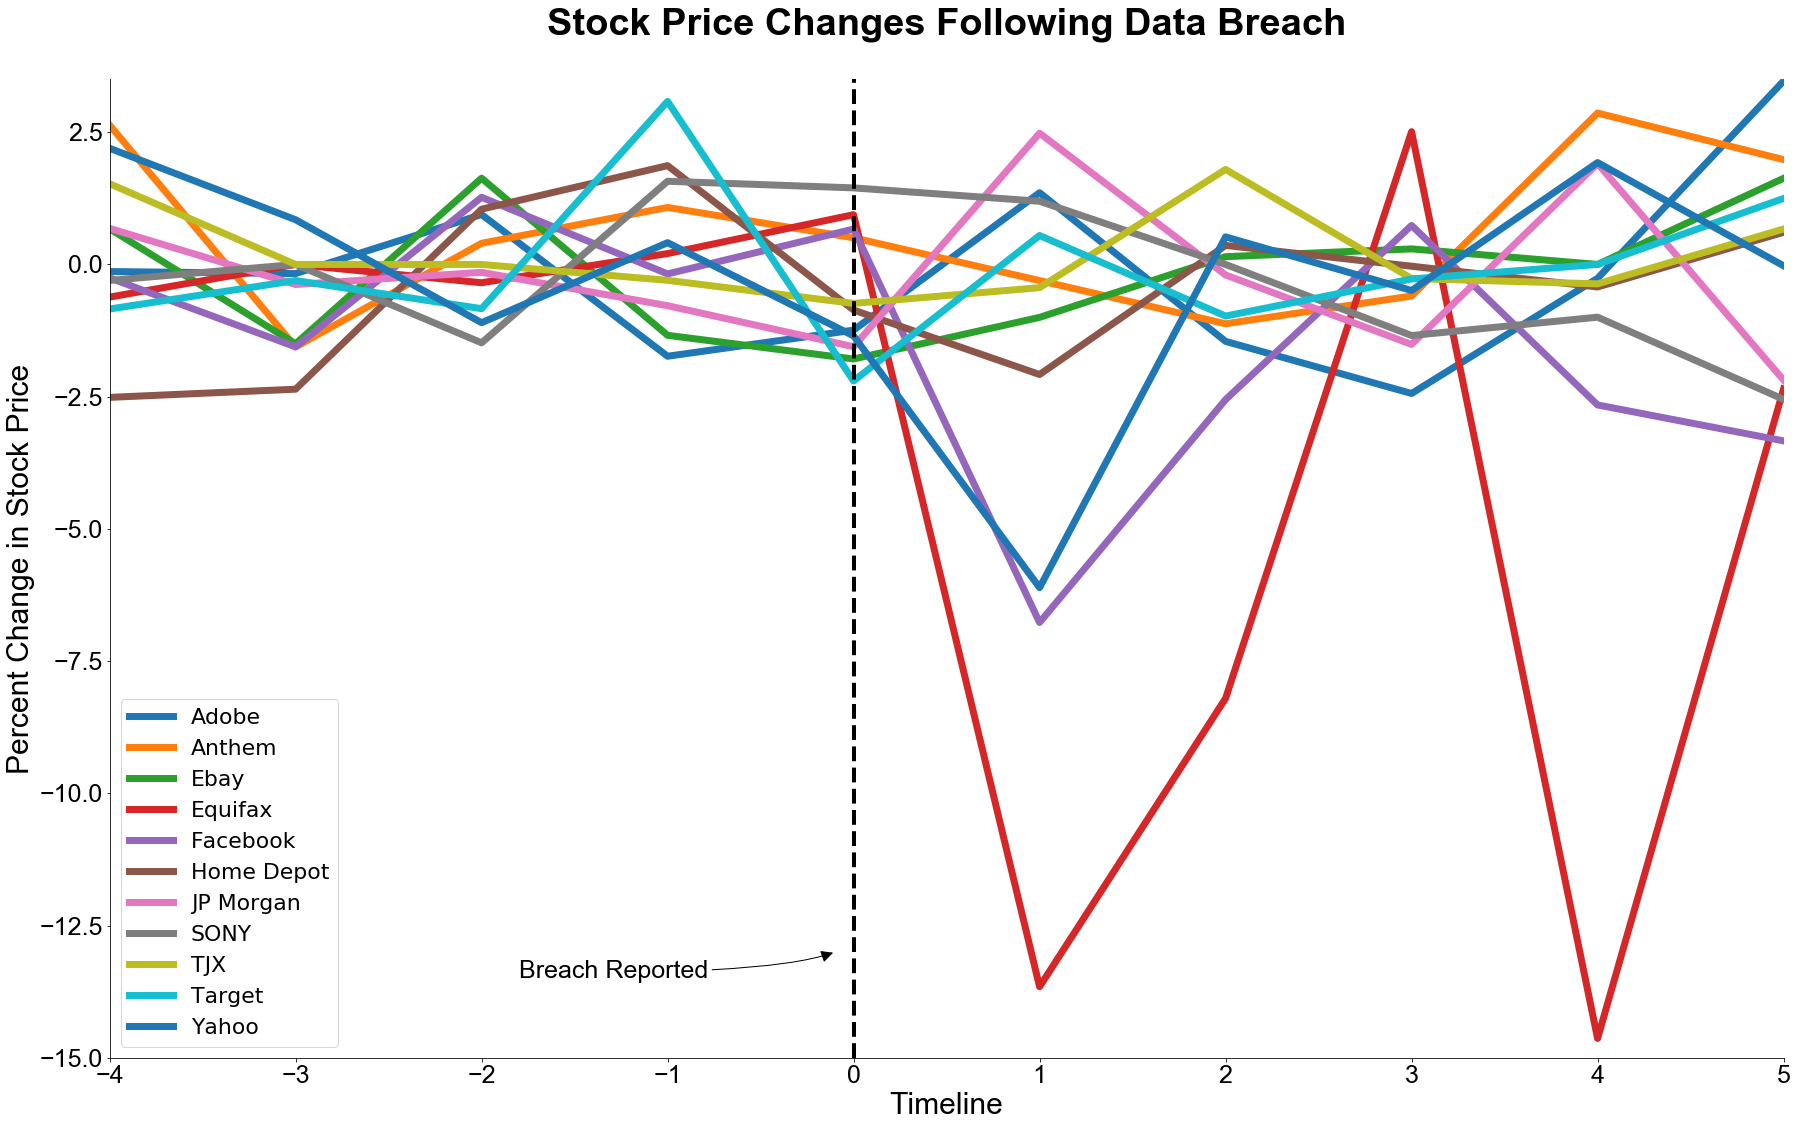

In [579]:
fig, ax = plt.subplots(figsize = (30,18))

companies = bigdata[["Company","Timeline","Percent_Change"]]
# Here, I make a new dataframe so that it is easier to plot the specific data I need.
by_comp = companies.groupby('Company')
# I group by Company so that the percent change and timeline
# for each company is represented graphically.

for name, group in by_comp:
    plt.plot(group['Timeline'], group['Percent_Change'], label=name, linewidth = 7)
# This for loop specifies which variables I would like plotted for each 
# company identified by name.

plt.legend(loc="lower left", prop={'size': 22})
# This command asks for a legend placed in the lower left
# corner of the graph, and to be a larger size.

plt.show


ax.set_ylim(-15,3.5) # I set the y limits to -15% and 3.5%.
ax.set_xlim(-4,5) # I set the x limits to -4 and 5 because -5 has no 
                  # percent change data.

plt.setp(ax.get_xticklabels(),fontsize=25,fontname = "Arial")
plt.setp(ax.get_yticklabels(),fontsize=25,fontname = "Arial")
# Here, I customize the x and y axis tick labels with font and size.

ax.set_title("Stock Price Changes Following Data Breach", size = 38, fontweight = "bold", 
             fontname = "Arial") # I customize the title.

ax.set_ylabel("Percent Change in Stock Price",size = 30,fontname = "Arial")
ax.set_xlabel("Timeline",size = 30,fontname = "Arial")
# I add axis titles and customizations.

ax.title.set_position([.5, 1.04]) 
# This spaces the title a little bit further above the graph.

# Now, I will produce a dotted line that indicates the breach date
# for the entire graph.

brch = 0 # This identifies the breach timeline value.

ax.axvline(x=brch,           # Set the value equal to the average
           color='black',    # Make the color black
           linestyle='--',   # The line style is dotted
           linewidth=4)      # Thickness of the line

ax.spines["right"].set_visible(False) # Removes the right border of the graph
ax.spines["top"].set_visible(False)   # Removes the top border of the graph

#The following commands create the arrow that points to the breach line.
ax.annotate("Breach Reported",
          xy=(-0.1,-13),           # The location of the arrow
          xycoords = 'data',       
          xytext = (-1.8,-13.5),   # Location of the arrow's text
          horizontalalignment = 'left', # Left alignement
          arrowprops = {'arrowstyle':'-|>', # Skinny arrow
                       "connectionstyle": "angle3,angleA=180,angleB=20", # Angle customization
                       "color":"black"}, # Black color arrow
           fontsize = 25, fontname = "Arial") # Font and size of arrow text

In [580]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

# This was used to show which fonts were available on matplotlib.

['/Library/Fonts/STIXNonUniBol.otf',
 '/Library/Fonts/Bodoni 72 Smallcaps Book.ttf',
 '/Library/Fonts/Apple Chancery.ttf',
 '/System/Library/Fonts/SFCompactRounded-Light.otf',
 '/System/Library/Fonts/Symbol.ttf',
 '/Library/Fonts/Arial Narrow Bold.ttf',
 '/System/Library/Fonts/SFNSDisplayCondensed-Medium.otf',
 '/Library/Fonts/AppleGothic.ttf',
 '/Library/Fonts/Courier New Bold Italic.ttf',
 '/Library/Fonts/Comic Sans MS Bold.ttf',
 '/Library/Fonts/STIXGeneral.otf',
 '/Library/Fonts/Georgia Italic.ttf',
 '/Library/Fonts/STIXNonUni.otf',
 '/System/Library/Fonts/SFCompactText-Bold.otf',
 '/Library/Fonts/Webdings.ttf',
 '/System/Library/Fonts/SFCompactText-Semibold.otf',
 '/Library/Fonts/Chalkduster.ttf',
 '/Library/Fonts/STIXIntDBol.otf',
 '/Library/Fonts/Arial Unicode.ttf',
 '/System/Library/Fonts/SFNSDisplayCondensed-Regular.otf',
 '/Library/Fonts/STIXIntUpDBol.otf',
 '/Library/Fonts/Arial Bold.ttf',
 '/Library/Fonts/STIXSizOneSymBol.otf',
 '/System/Library/Fonts/SFNSTextItalic.ttf',
 

As shown in the graph, the largest data breach effects in terms of the percent change in stock price from the breach report date to the following days were from Equifax, Facebook, and Adobe. Equifax is a financial services technology firm, while both Facebook and Adobe are tech companies. Now, I would like to explore how data breach effects behave across the different industries of this dataframe.

## The Effects of Data Breaches Across Industries

In [581]:
finance = bigdata.set_index("Industry").loc["Financial"].groupby("Company")
insurance = bigdata.set_index("Industry").loc["Insurance"].groupby("Company")
retail = bigdata.set_index("Industry").loc["Retail"].groupby("Company")
tech = bigdata.set_index("Industry").loc["Tech"].groupby("Company")

by_ind = finance, insurance, retail, tech
by_ind

(<pandas.core.groupby.DataFrameGroupBy object at 0x138626b38>,
 <pandas.core.groupby.DataFrameGroupBy object at 0x12ea79a58>)

Text(0.5,0,'Timeline')

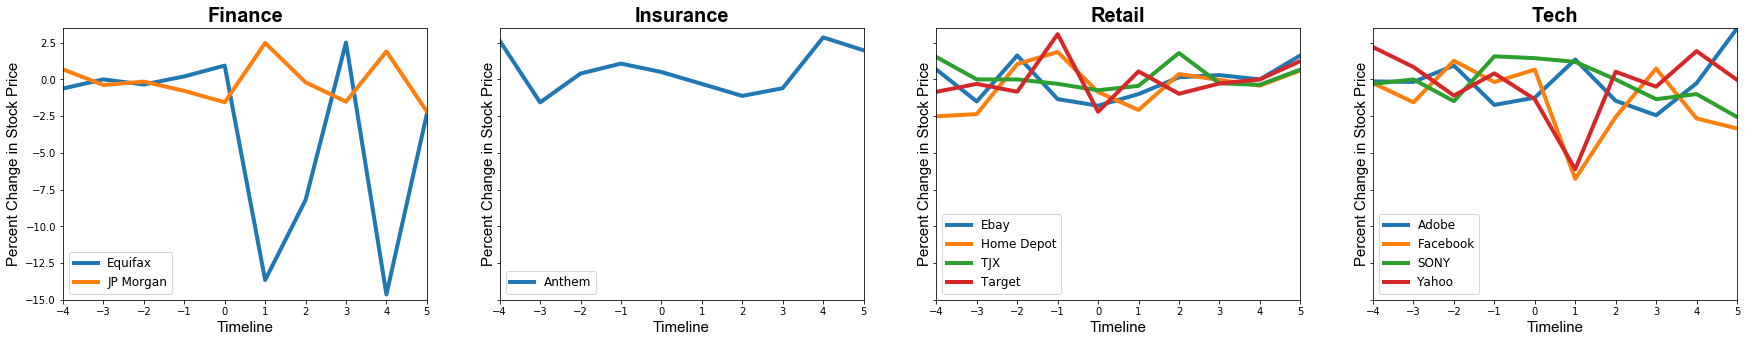

In [582]:
fig, axs = plt.subplots(1,4, figsize = (30,5), sharex = True, sharey = True)


for name, group in finance:
    axs[0].plot(group['Timeline'], group['Percent_Change'], label=name, linewidth = 4)
# This for loop specifies which variables I would like plotted for each 
# company identified by name.
axs[0].legend(loc="lower left", prop={'size': 12})
axs[0].set_ylim(-15,3.5) 
axs[0].set_xlim(-4,5)
axs[0].set_title("Finance", size = 20, fontweight = "bold", 
             fontname = "Arial")
axs[0].set_ylabel("Percent Change in Stock Price",size = 15,fontname = "Arial")
axs[0].set_xlabel("Timeline",size = 15,fontname = "Arial")



for name, group in insurance:
    axs[1].plot(group['Timeline'], group['Percent_Change'], label=name, linewidth = 4)
axs[1].legend(loc="lower left", prop={'size': 12})
axs[1].set_title("Insurance", size = 20, fontweight = "bold", 
             fontname = "Arial")
axs[1].set_ylabel("Percent Change in Stock Price",size = 15,fontname = "Arial")
axs[1].set_xlabel("Timeline",size = 15,fontname = "Arial")    



for name, group in retail:
    axs[2].plot(group['Timeline'], group['Percent_Change'], label=name, linewidth = 4)
axs[2].legend(loc="lower left", prop={'size': 12})
axs[2].set_title("Retail", size = 20, fontweight = "bold", 
             fontname = "Arial")
axs[2].set_ylabel("Percent Change in Stock Price",size = 15,fontname = "Arial")
axs[2].set_xlabel("Timeline",size = 15,fontname = "Arial")



for name, group in tech:
    axs[3].plot(group['Timeline'], group['Percent_Change'], label=name, linewidth = 4)
axs[3].legend(loc="lower left", prop={'size': 12})
axs[3].set_title("Tech", size = 20, fontweight = "bold", 
             fontname = "Arial")
axs[3].set_ylabel("Percent Change in Stock Price",size = 15,fontname = "Arial")
axs[3].set_xlabel("Timeline",size = 15,fontname = "Arial")

   While the sample size is not large because of the specificity of the project (companies had to be publicly traded stocks and have data breaches that affected more than 10 million users), these juxtaposed graphs illustrate the behavior of each industry in response to the data breaches presented in this project.   

   In the finance industry, while Equifax exhibited a dramatic decrease in stock price following a breach, JP Morgan's stock price actually increased. This was likely due to the fact that the breach report mentioned no hacking of valuable data. Hackers only obtained names, emails, and addresses of the company's clients.
   It is difficult to say that the Anthem case is relevant to all insurance companies, but Anthem did not show a significant decrease in stock price. Retail also lacked significant stock price changes following the breaches for its companies. Tech, like finance, exhibited mixed reviews, with two companies, Facebook and Yahoo's respective prices declining, while Adobe increased and Sony remained consistent in its decline from before the time of the breach. 
   
   To better understand the effect of data breaches aross industries, I will take the average percent change in stock price for each industry and compare.

In [583]:
ind_mean = bigdata.groupby("Industry").Percent_Change.describe()
ind_mean

,count,mean,std,min,25%,50%,75%,max
Industry,,,,,,,,
Financial,20.0,-1.892380,4.758188,-14.634357,-1.713331,-0.362929,0.324553,2.510608
Insurance,10.0,0.587528,1.539510,-1.560904,-0.523992,0.451958,1.755966,2.861803
Retail,40.0,-0.108146,1.257235,-2.513369,-0.847644,-0.150007,0.623436,3.081914
Tech,40.0,-0.548736,2.019344,-6.769680,-1.461246,-0.216451,0.764379,3.468150


The largest percent change in stock price is among the data's financial and tech firms, but as we learned above, Equifax is a significant outlier in the data and has shown the largest percent change out of any firm in the data set. Retail exhibited the least amount of change in stock price. 

Why did this pattern occur?

Retail consumers are not as concerned with retail data breaches as they are with technology related data (social media, search). Perhaps it is because these consumers believe that data held by retailers is not nearly as significant as the data collected by tech firms. Tech firms have arsenals of information related to payment, addresses, associations, behavior, personal preferences, and search history. While retailers may also have this information on file, consumers may not associate retail breaches with the same severity as they might associate with technology related breaches. Investors have also caught on to this idea and do not quickly sell off their shares as soon as a data breach is reported; they do not expect consumers to change their shopping behavior or relationship with the breached retailer in a significant way.

This raises an important issue: what will motivate retailers to enhance their security measures if their investors hardly bugde when something like this happens?

## Breach Size and Stock Price Change

Now, I would like to analyze the relationship between the size of the breach (how many people were affected) and the magnitude of the percent change in stock price. It seems intuitive that a company with more users to be affected by a data breach would be a larger company and therefore have more investors to influence stock prices. This section will explore that relationship and help me understand how breach size affects investor decisions.

I will begin by extracting data related to the mean percent change in stock price for each company.

In [584]:
breach_size = bigdata.groupby("Company").Percent_Change.describe()
breach_size

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
Adobe,10.0,-0.167406,1.739025,-2.439984,-1.401309,-0.217590,0.673958,3.468150
Anthem,10.0,0.587528,1.539510,-1.560904,-0.523992,0.451958,1.755966,2.861803
Ebay,10.0,-0.125331,1.245496,-1.787405,-1.255355,0.073376,0.579867,1.630828
Equifax,10.0,-3.615536,6.240664,-14.634357,-6.741572,-0.481872,0.154146,2.510608
Facebook,10.0,-1.463265,2.455436,-6.769680,-2.631352,-0.906259,0.456950,1.270068
Home Depot,10.0,-0.439430,1.501383,-2.513369,-1.776367,-0.229763,0.545834,1.868120
JP Morgan,10.0,-0.169225,1.500684,-2.185430,-1.329151,-0.289397,0.473927,2.481305
SONY,10.0,-0.246226,1.373786,-2.551192,-1.257449,-0.151108,0.895820,1.572650
TJX,10.0,0.188275,0.861715,-0.737018,-0.350609,-0.133200,0.502681,1.796610


Now, I will create a column in the breach_size data frame that identifies the size of the breach for each company in terms of millions of people affected.

In [585]:
breach_size["Breach_Size (millions)"] = {38,80,145,143,87,56,76,77,110,94,3000} 
breach_size

,count,mean,std,min,25%,50%,75%,max,Breach_Size (millions)
Company,,,,,,,,,
Adobe,10.0,-0.167406,1.739025,-2.439984,-1.401309,-0.217590,0.673958,3.468150,38
Anthem,10.0,0.587528,1.539510,-1.560904,-0.523992,0.451958,1.755966,2.861803,76
Ebay,10.0,-0.125331,1.245496,-1.787405,-1.255355,0.073376,0.579867,1.630828,77
Equifax,10.0,-3.615536,6.240664,-14.634357,-6.741572,-0.481872,0.154146,2.510608,110
Facebook,10.0,-1.463265,2.455436,-6.769680,-2.631352,-0.906259,0.456950,1.270068,143
Home Depot,10.0,-0.439430,1.501383,-2.513369,-1.776367,-0.229763,0.545834,1.868120,80
JP Morgan,10.0,-0.169225,1.500684,-2.185430,-1.329151,-0.289397,0.473927,2.481305,145
SONY,10.0,-0.246226,1.373786,-2.551192,-1.257449,-0.151108,0.895820,1.572650,3000
TJX,10.0,0.188275,0.861715,-0.737018,-0.350609,-0.133200,0.502681,1.796610,87


I will now create a scatterplot which explores the relationship between percent change in stock price and the size of the breach. Yahoo's breach size is quite an outlier for the data, and so it might distort our perception of the relationship between breach size and stock price changes. As such, I will create two scatterplots; one with Yahoo included and one without.

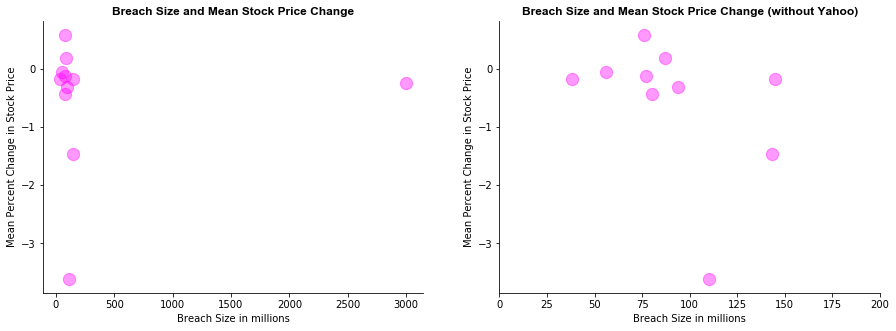

In [586]:
fig, ax = plt.subplots(1,2, figsize = (15,5))

ax[0].scatter(breach_size["Breach_Size (millions)"],breach_size["mean"], s = 150, alpha = 0.4, 
           color = "magenta" )
ax[0].set_title('Breach Size and Mean Stock Price Change', loc='center', fontsize=12, 
             fontweight = "bold", fontname = "Arial") 
ax[0].set_xlabel("Breach Size in millions")
ax[0].set_ylabel("Mean Percent Change in Stock Price")
ax[0].spines["right"].set_visible(False) 
ax[0].spines["top"].set_visible(False) 


ax[1].scatter(breach_size["Breach_Size (millions)"],breach_size["mean"], s = 150, alpha = 0.4, 
           color = "magenta" )
ax[1].set_title('Breach Size and Mean Stock Price Change (without Yahoo)', loc='center', fontsize=12, 
             fontweight = "bold", fontname = "Arial") 
ax[1].set_xlabel("Breach Size in millions")
ax[1].set_ylabel("Mean Percent Change in Stock Price")
ax[1].spines["right"].set_visible(False) 
ax[1].spines["top"].set_visible(False) 
ax[1].set_xlim (0,200)

plt.show()

The second graph (right) is far more clear than first graph, which does contain Yahoo. Based on the available data, we can easily infer from both graphs that there is no significant relationship between the size of a data breach and its effect on the stock price of a company. However, the sample size is not large enough to make any accurate conclusions.

# Conclusions

While the sample size was too small to make any accurate conclusions or inferences, I do have good visualizations of how data breaches affect different kinds of companies. For example, the dramatic behavior of Equifax, a credit reporting agency, illustrates the severity of a breach of that information. Credit reports influence creditor decisions which affect how individuals can purchase a home, lease a car, take out student loans, and apply for credit cards. If this information were to be stolen or manipulated in any way, the implications would be as significant as the stock price changes the company reported during that time. The graph illustrating retail companies confirmed a theory regarding the nonchalance of consumers toward retail data breaches at their local target or favorite clothing store, which don't influence financial decisions or hold any significant information to do so.

# Limitations of the Data

The data in this project present several limitations. 

**1. Sample Size:** The sample size is very small, and certainly too small to establish any significant conclusions or inferences about data breaches. The sample size is small for several reasons. The companies presented in this project had to meet two criteria:   

a) be an American, publicly traded company  
b) be a victim of a data breach which affected at least 10 million users.  

Many companies affected by data breaches of larger magnitudes were based outside of the US, including Aadhaar (India), Philippine's Commission on Elections (Philippines), Turkish Citizenship Database (Turkey), and others. Among the database of data breaches, many were not publicly traded companies. Others only affected several hundred thousand users. Friend Finder Network, a strong candidate in my project proposal, actually declared bankruptcy and is no longer publicly traded. It was removed from the data set.

**2. Vagueness of Data Breach Reports/Lack of Information:** Several companies who issued reports on their data breaches were intentionally vague in their reports, witholding information like the date of the breach or the number of users affected. This affected my sample size, as each company's report for the purposes of this project needed to contain that information. For most of the companies, I had to manually find the breach report date from reading news articles and finding the oldest one, or by looking at the date of the article and counting back to the day of the week the article said the breach was reported by the company.

# Sources

www.cnnmoney.com  
www.csoonline.com  
www.forbes.com  
www.informationisbeautiful.net  
www.washingtonpost.com  